<a href="https://colab.research.google.com/github/Rohne-K/TMDL_group1_project/blob/main/CodeFinalVersion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have chosen to work on a datset regarding heart attack predictions in Indonesia. The dataset was obtained from Kaggle and spans 158355 observations. We have loaded the dataset and explored some summary statistics and correlations. Furthermore, missing values were handled and variables transformed to make working with the data easier. Logistic regressions, decision trees and random forests were employed and relevant hyperparameters tuned. The best models were compared with respect to evaluation metrics such as accuracy and recall and training and inference time.

# Loading Data and Packages

In [34]:
# Load relevant packages
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from google.colab import drive
from time import perf_counter
from tqdm import tqdm
from sklearn import tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Load dataset from drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/code turing')

Mounted at /content/drive


# Exploratory Data Analysis and Variable Transformation

In [4]:
# Show columns with categorical variables
df = pd.read_csv("heart_attack_prediction_indonesia.csv")
df.loc[:,['gender', 'region', 'income_level', 'smoking_status', 'alcohol_consumption', 'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'EKG_results']]

,gender,region,income_level,smoking_status,alcohol_consumption,physical_activity,dietary_habits,air_pollution_exposure,stress_level,EKG_results
0,Male,Rural,Middle,Never,NaN,High,Unhealthy,Moderate,Moderate,Normal
1,Female,Urban,Low,Past,NaN,Moderate,Healthy,High,High,Normal
2,Female,Urban,Low,Past,Moderate,Moderate,Healthy,Low,Low,Abnormal
3,Male,Urban,Low,Never,Moderate,Moderate,Unhealthy,Low,High,Normal
4,Male,Urban,Middle,Current,Moderate,Moderate,Unhealthy,High,Moderate,Normal
...,...,...,...,...,...,...,...,...,...,...
158350,Female,Rural,Middle,Never,NaN,High,Healthy,Moderate,High,Normal
158351,Female,Urban,Low,Never,NaN,Moderate,Healthy,High,High,Normal
158352,Male,Urban,Middle,Past,Moderate,Low,Healthy,Low,Moderate,Abnormal
158353,Male,Urban,Middle,Past,NaN,Low,Unhealthy,High,High,Normal


In [5]:
# Show summary statistics of dataset
display(df.describe())
df.info()

,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000
mean,54.543778,0.299069,0.199804,199.533264,0.249901,93.268504,0.300218,6.480064,129.515772,79.490809,110.736762,49.491478,129.569916,149.715885,0.200575,0.499770,0.601029,0.401004
std,11.910897,0.457851,0.399854,39.737565,0.432957,16.382205,0.458354,1.425398,15.005641,10.002964,27.673445,9.982634,34.913318,49.023473,0.400432,0.500002,0.489688,0.490103
min,25.000000,0.000000,0.000000,100.000000,0.000000,20.000000,0.000000,3.000000,61.000000,37.000000,70.000000,8.000000,-19.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,5.492985,119.000000,73.000000,89.000000,43.000000,106.000000,116.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,199.000000,0.000000,93.000000,0.000000,6.507461,130.000000,80.000000,109.000000,49.000000,130.000000,149.000000,0.000000,0.000000,1.000000,0.000000
75%,63.000000,1.000000,0.000000,226.000000,0.000000,104.000000,1.000000,7.520640,140.000000,86.000000,130.000000,56.000000,153.000000,183.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,350.000000,1.000000,173.000000,1.000000,9.000000,199.000000,127.000000,230.000000,93.000000,282.000000,380.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

In [6]:
# Alcohol consumption of "None" is recognized as N/A so fill this back in
print(df['alcohol_consumption'].value_counts())
df = df.fillna("None")
df.info()

alcohol_consumption
Moderate    47725
High        15782
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 

In [8]:
# Loop through categorical columns and encode them
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {list(categorical_columns)}")

label_encoder = LabelEncoder()
for col in categorical_columns:
    unique_values = df[col].nunique()

    # Binary encoding
    if unique_values == 2:
        df[col] = label_encoder.fit_transform(df[col])
    # One-hot encoding for more than 2 categories
    else:
        one_hot = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, one_hot], axis=1)
        df.drop(columns=[col], inplace=True)

df.info()

Categorical Columns: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 40 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   age                              158355 non-null  int64  
 1   gender                           158355 non-null  int64  
 2   region                           158355 non-null  int64  
 3   hypertension                     158355 non-null  int64  
 4   diabetes                         158355 non-null  int64  
 5   cholesterol_level                158355 non-null  int64  
 6   obesity                          158355 non-null  int64  
 7   waist_circumference              158355 non-null  int64  
 8   family_history                   158355 non-null  int64  
 9   dietary_habits                   158355 non-null  int64  
 10  sleep_hours                      158355 non-null  float64
 11  blood_pressure_systolic          158355 n

# Summary Statistics

(array([94854., 63501.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

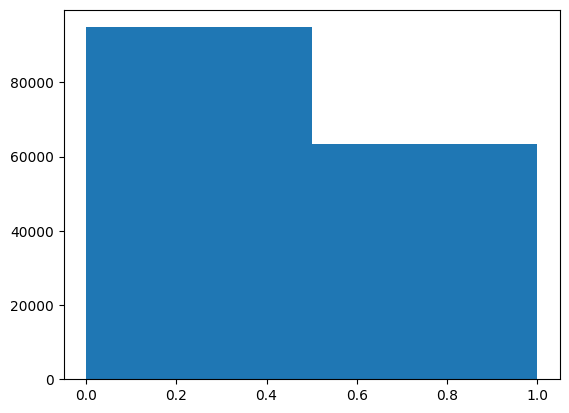

In [13]:
# Plot a histogram of heart attacks
plt.hist(df['heart_attack'], bins = 2)

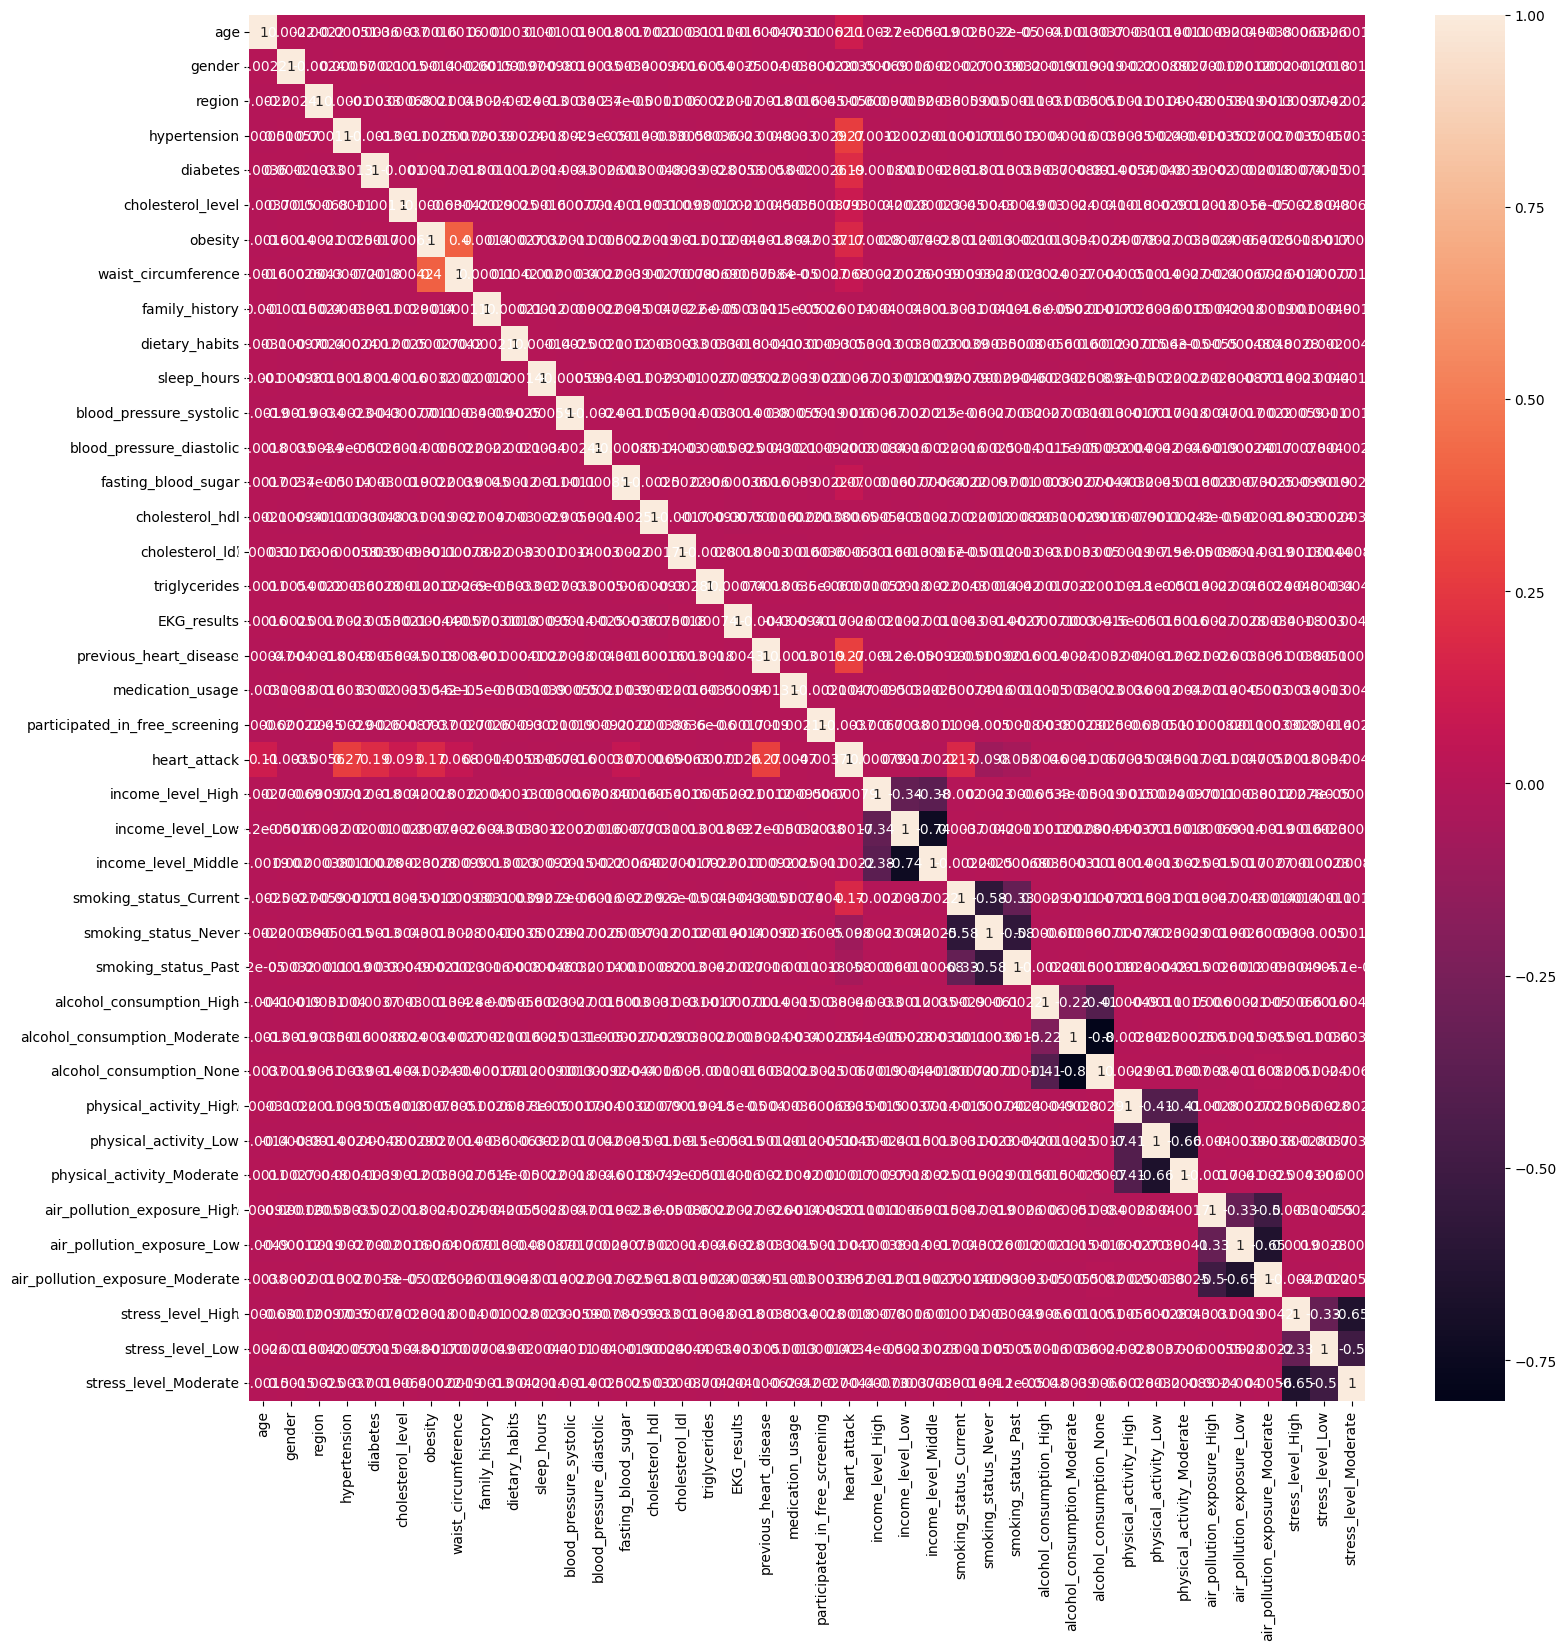

In [12]:
# Plot the correlation matrix of all numeric columns
plt.figure(figsize = (18, 18))
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

In [21]:
# Define features and target variable and split training and testing set
X = df.drop(columns=['heart_attack'])
X = pd.get_dummies(X, drop_first=True).astype('int')
y = df['heart_attack'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [23]:
# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
report = classification_report(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79     18906
           1       0.70      0.59      0.64     12765

    accuracy                           0.73     31671
   macro avg       0.72      0.71      0.71     31671
weighted avg       0.73      0.73      0.73     31671



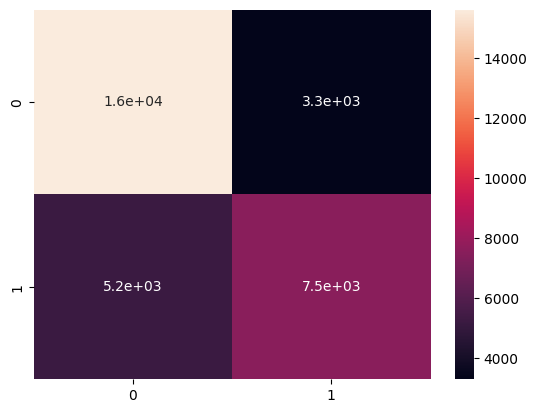

In [25]:
# Print model results
print("Classification Report:\n", report)

plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

# Decision Tree

In [26]:
# Train decision tree model
train_acc_mean, train_acc_std = [], []
test_acc_mean, test_acc_std = [], []

for d in tqdm(range(15)):
    train_perfs = []
    test_perfs = []
    for n in range(5):
        modelDT = tree.DecisionTreeClassifier(max_depth = d + 1)
        modelDT = modelDT.fit(X_train, y_train)

        train_perfs.append(modelDT.score(X_train, y_train))
        test_perfs.append(modelDT.score(X_test, y_test))

    train_acc_mean.append(np.mean(train_perfs))
    train_acc_std.append(np.std(train_perfs))
    test_acc_mean.append(np.mean(test_perfs))
    test_acc_std.append(np.std(test_perfs))

100%|██████████| 15/15 [01:37<00:00,  6.49s/it]


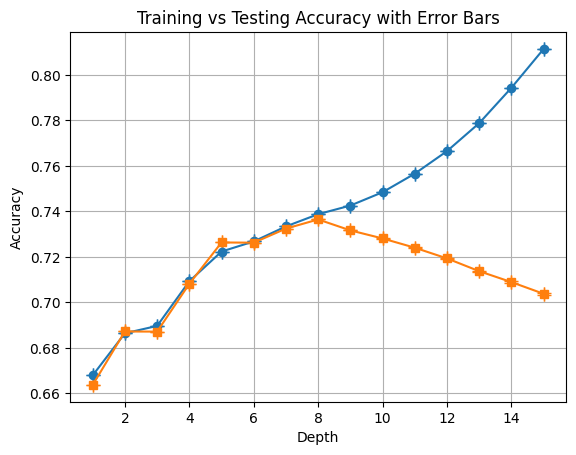

In [27]:
# Print hyperparameter tuning results
plt.errorbar(np.arange(1, 16), train_acc_mean, yerr = train_acc_std, xerr = np.zeros(15), label = "Train Accuracy", fmt = '-o', capsize = 5)
plt.errorbar(np.arange(1, 16), test_acc_mean, yerr = test_acc_std, xerr = np.zeros(15), label = "Test Accuracy", fmt = '-s', capsize = 5)
plt.title("Training vs Testing Accuracy with Error Bars")
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.grid(True)
plt.show()

              precision    recall  f1-score   support

           0       0.76      0.82      0.79     18906
           1       0.70      0.61      0.65     12765

    accuracy                           0.74     31671
   macro avg       0.73      0.72      0.72     31671
weighted avg       0.73      0.74      0.73     31671



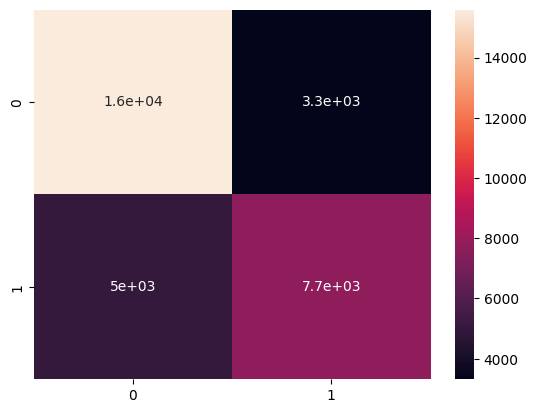

In [28]:
# Print best model results
modelDT = tree.DecisionTreeClassifier(max_depth = 8)
modelDT = modelDT.fit(X_train, y_train)
y_pred = modelDT.predict(X_test)

print(classification_report(y_test, y_pred))

plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

# Random Forest

In [31]:
# Train random forest model
train_acc_mean, train_acc_std = np.zeros((8, 8)), np.zeros((8, 8))
test_acc_mean, test_acc_std = np.zeros((8, 8)), np.zeros((8, 8))

n_trees = [5, 10, 15, 20, 25, 30, 35, 40]
depths = [1, 3, 5, 7, 9, 11, 13, 15]

for tree_idx, n_tree in tqdm(enumerate(n_trees), total=len(n_trees)):
    for d_idx, d in enumerate(depths):
        train_perfs = []
        test_perfs = []
        for n in range(5):
            modelRFC = RFC(n_tree, max_depth = d)
            modelRFC = modelRFC.fit(X_train, y_train)

            train_perfs.append(modelRFC.score(X_train, y_train))
            test_perfs.append(modelRFC.score(X_test, y_test))

        train_acc_mean[tree_idx][d_idx] = np.mean(train_perfs)
        train_acc_std[tree_idx][d_idx] = np.std(train_perfs)
        test_acc_mean[tree_idx][d_idx] = np.mean(test_perfs)
        test_acc_std[tree_idx][d_idx] = np.std(test_perfs)

100%|██████████| 8/8 [20:18<00:00, 152.31s/it]


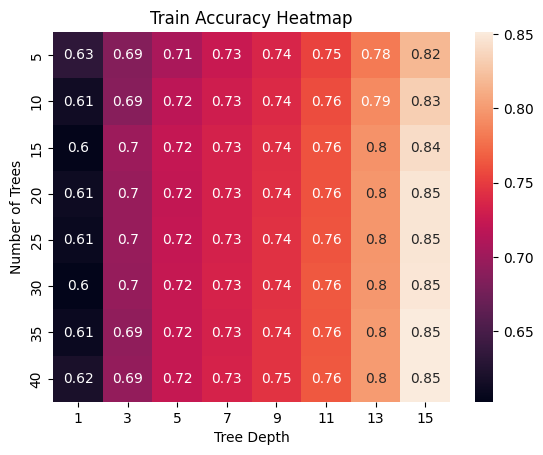

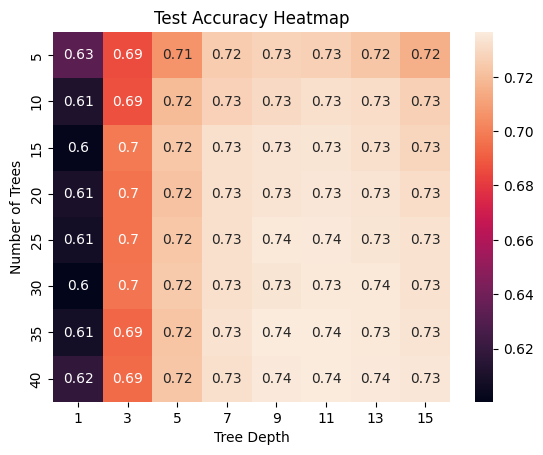

In [32]:
# Print hyperparameter tuning results
plt.figure()
sns.heatmap(train_acc_mean, annot = True, xticklabels = depths, yticklabels = n_trees)
plt.xlabel("Tree Depth")
plt.ylabel("Number of Trees")
plt.title("Train Accuracy Heatmap")
plt.show()

plt.figure()
sns.heatmap(test_acc_mean, annot = True, xticklabels = depths, yticklabels = n_trees)
plt.xlabel("Tree Depth")
plt.ylabel("Number of Trees")
plt.title("Test Accuracy Heatmap")
plt.show()

              precision    recall  f1-score   support

           0       0.74      0.85      0.79     18906
           1       0.71      0.57      0.63     12765

    accuracy                           0.73     31671
   macro avg       0.73      0.71      0.71     31671
weighted avg       0.73      0.73      0.73     31671



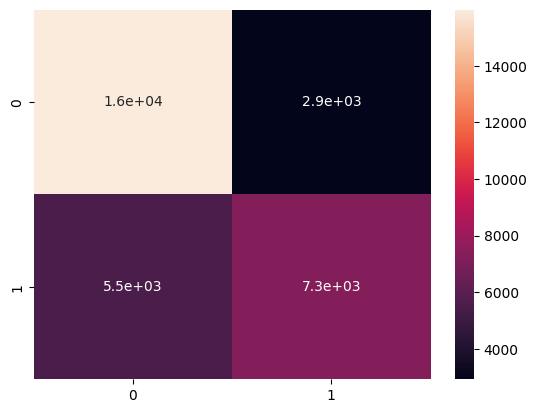

In [33]:
# Print best model results
modelRFC = RFC(n_estimators = 25, max_depth = 9)
modelRFC = modelRFC.fit(X_train, y_train)
y_pred = modelRFC.predict(X_test)

print(classification_report(y_test, y_pred))

plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

# Model Comparison and Evaluation

In [35]:
# Compare the model accuracy and speed
n_train, n_test = 158355 * 0.8, 158355 * 0.2

train_scores = []
test_scores = []
fit_times = []
inf_times = []

def train_and_eval(model, train_X, train_y, test_X, test_y):
    start = perf_counter()
    model = model.fit(train_X, train_y)
    end = perf_counter()
    fit_time = (end - start) / len(train_X)

    start = perf_counter()
    train_score = model.score(train_X, train_y)
    end = perf_counter()
    train_score_time = (end - start) / len(train_X)

    start = perf_counter()
    test_score = model.score(test_X, test_y)
    end = perf_counter()
    test_score_time = (end - start) / len(test_X)

    return train_score, test_score, fit_time, train_score_time, test_score_time

modelLR = LogisticRegression()
modelDT = tree.DecisionTreeClassifier(max_depth = 8)
modelRFC = RFC(25, max_depth = 9)

for model in tqdm([modelLR, modelDT, modelRFC]):
    train_score, test_score, fit_time, train_score_time, test_score_time = train_and_eval(model, X_train, y_train, X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    fit_times.append(fit_time)
    inf_times.append(train_score_time + test_score_time)

  0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 3/3 [00:08<00:00,  3.00s/it]


<ipython-input-36-14cdda4f111a>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


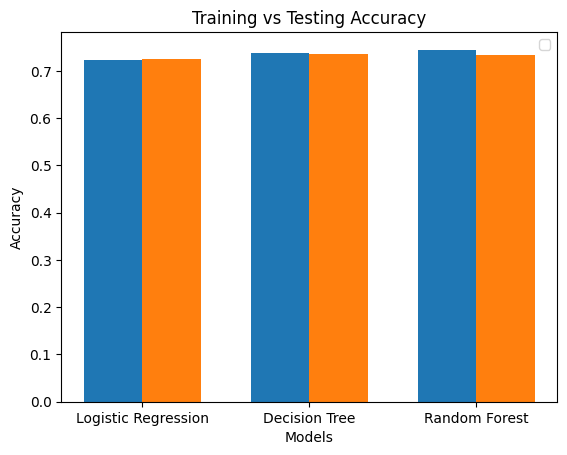

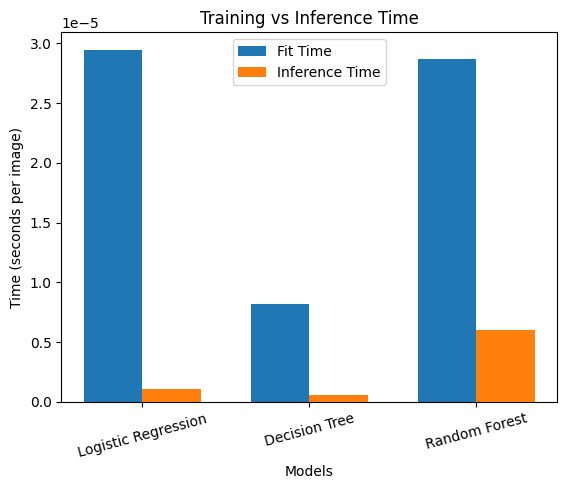

In [36]:
# Print accuracy and speed plots
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]
bar_width = 0.35
x = np.arange(len(model_names))

fig, ax = plt.subplots()
bar1 = ax.bar(x, train_scores, width = bar_width, label = "")
bar2 = ax.bar(x + bar_width, test_scores, width=bar_width, label="")
ax.set_xlabel("Models")
ax.set_ylabel("Accuracy")
ax.set_title("Training vs Testing Accuracy")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

fig, ax = plt.subplots()
bar1 = ax.bar(x, fit_times, width = bar_width, label = "Fit Time")
bar2 = ax.bar(x + bar_width, inf_times, width = bar_width, label = "Inference Time")
ax.set_xlabel("Models")
ax.set_ylabel("Time (seconds per image)")
ax.set_title("Training vs Inference Time")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(model_names, rotation=15)
ax.legend()

plt.show()